In [1]:
import re
import requests
from bs4 import BeautifulSoup
import time
import numpy as np
import pandas as pd
from urllib.request import urlopen

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_unemployment_rate'

In [3]:
html = urlopen(url)
soup = BeautifulSoup(html,'html.parser')

In [4]:
soup.title.string

'List of countries by unemployment rate - Wikipedia'

In [5]:
tables = soup.findAll('table')

In [6]:
tables

[<table class="box-Update plainlinks metadata ambox ambox-content ambox-Update" role="presentation"><tbody><tr><td class="mbox-image"><div style="width:52px"><img alt="Ambox current red Americas.svg" data-file-height="290" data-file-width="360" decoding="async" height="34" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Ambox_current_red_Americas.svg/42px-Ambox_current_red_Americas.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Ambox_current_red_Americas.svg/63px-Ambox_current_red_Americas.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/53/Ambox_current_red_Americas.svg/84px-Ambox_current_red_Americas.svg.png 2x" width="42"/></div></td><td class="mbox-text"><div class="mbox-text-span">This article needs to be <b>updated</b>.<span class="hide-when-compact"> Please update this article to reflect recent events or newly available information.</span> <small class="date-container"><i>(<span class="date">April 2020</span>)</i></small></div></td></

In [7]:
names= []
Rate = []
for table in tables:
    rows = table.findAll('tr')
    
    for row in rows:
        cells = row.findAll('td')
        
        if len(cells) > 1:
            name = cells[0]
            names.append(name.text.strip())
            
            rate = cells[1]
            Rate.append(rate.text.strip())
            

In [8]:
df = pd.DataFrame()
df['Name'] = names
df['Rate'] = Rate

In [9]:
df

,Name,Rate
0,,This article needs to be updated. Please updat...
1,Afghanistan,3.9
2,Albania,11.5
3,Algeria,11.2
4,American Samoa (United States),9.2
...,...,...
195,U.S. Virgin Islands (United States),9.5
196,Wallis and Futuna (France),12.2
197,Yemen,35.0
198,Zambia,15.0


In [10]:
df = df.drop([0])

In [11]:
df = df.rename(columns={'Rate':'Unemployment_rate'})

In [12]:
df.isnull().sum()

Name                 0
Unemployment_rate    0
dtype: int64

In [13]:
df

,Name,Unemployment_rate
1,Afghanistan,3.9
2,Albania,11.5
3,Algeria,11.2
4,American Samoa (United States),9.2
5,Andorra,3.7
...,...,...
195,U.S. Virgin Islands (United States),9.5
196,Wallis and Futuna (France),12.2
197,Yemen,35.0
198,Zambia,15.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 1 to 199
Data columns (total 2 columns):
Name                 199 non-null object
Unemployment_rate    199 non-null object
dtypes: object(2)
memory usage: 4.7+ KB


In [15]:
df['Unemployment_rate'] = df['Unemployment_rate'].str.strip()

In [16]:
df['Unemployment_rate']  = df['Unemployment_rate'].str.rstrip()

In [17]:
df['Unemployment_rate'].values

array(['3.9', '11.5', '11.2', '9.2', '3.7', '7.8', '11.0', '10.6', '20.6',
       '7.7', '5.0', '5.1', '6.0', '3.8', '4.0[a]', '10.5', '5.6', '6.2',
       '10.1', '7.0', '3.2', '4.0', '20.5', '20.0', '13.1', '2.9', '6.9',
       '5.4', '4.0', '0.3', '4.4', '13.7', '9.0', '4.2', '6.9', '5.89',
       '7.0', '3.9', '6.7', '9.4', '6.5', '13.1', '12.4', '5.8', '2.6',
       '6.8', '3.4', '4.8', '40.0', '23.0', '14.4', '4.4', '4.2', '7.5',
       '7.0', '8.6', '5.8', '28.0', '6.7', '0.9', '8.6', '7.2', '8.9',
       '11.7', '28.0', '12.8', '3.3', '11.9', '1.0', '16.3', '6.8',
       '24.0', '4.5', '2.3', '1.0', '9.0', '5.9', '5.2', '3.7', '2.9',
       '27.1[]', '5.0', '12.00', '16.0', '4.6', '0.7 (1.8 ILO)', '3.7',
       '8.4', '10.4', '2.4', '1.3 (4.0 ILO)', '18.5', '4.9', '7.4',
       '38.2', '28.6', '2.1', '7.2', '1.5', '8.7', '6.6', '28.1', '13.0',
       '2.1', '6.3', '5.0', '2.0', '3.5', '8.1', '3.7', '36.0', '11.7',
       '6.9', '25.4', '3.80', '16.2', '4.2', '2.0', '7.3', '14.4

In [18]:
def remove1(x):
    tokens = x.split()
    return tokens[0]

In [19]:
df['Unemployment_rate']= df['Unemployment_rate'].apply(remove1)

In [20]:
df['Unemployment_rate'].values

array(['3.9', '11.5', '11.2', '9.2', '3.7', '7.8', '11.0', '10.6', '20.6',
       '7.7', '5.0', '5.1', '6.0', '3.8', '4.0[a]', '10.5', '5.6', '6.2',
       '10.1', '7.0', '3.2', '4.0', '20.5', '20.0', '13.1', '2.9', '6.9',
       '5.4', '4.0', '0.3', '4.4', '13.7', '9.0', '4.2', '6.9', '5.89',
       '7.0', '3.9', '6.7', '9.4', '6.5', '13.1', '12.4', '5.8', '2.6',
       '6.8', '3.4', '4.8', '40.0', '23.0', '14.4', '4.4', '4.2', '7.5',
       '7.0', '8.6', '5.8', '28.0', '6.7', '0.9', '8.6', '7.2', '8.9',
       '11.7', '28.0', '12.8', '3.3', '11.9', '1.0', '16.3', '6.8',
       '24.0', '4.5', '2.3', '1.0', '9.0', '5.9', '5.2', '3.7', '2.9',
       '27.1[]', '5.0', '12.00', '16.0', '4.6', '0.7', '3.7', '8.4',
       '10.4', '2.4', '1.3', '18.5', '4.9', '7.4', '38.2', '28.6', '2.1',
       '7.2', '1.5', '8.7', '6.6', '28.1', '13.0', '2.1', '6.3', '5.0',
       '2.0', '3.5', '8.1', '3.7', '36.0', '11.7', '6.9', '25.4', '3.80',
       '16.2', '4.2', '2.0', '7.3', '14.4', '5.6', '18.7', '2

In [21]:
def process_num(num):
    return (re.sub(r'[^\d.]','',num))
    #return float (re.sub(r'[a-z]+', '',num))
    

In [48]:
print(process_num('4.0[a]'))
print(process_num('4.0[]'))

4.0
4.0


In [24]:
df['Unemployment_rate']= df['Unemployment_rate'].apply(process_num)

In [25]:
df['Unemployment_rate'].values

array(['3.9', '11.5', '11.2', '9.2', '3.7', '7.8', '11.0', '10.6', '20.6',
       '7.7', '5.0', '5.1', '6.0', '3.8', '4.0', '10.5', '5.6', '6.2',
       '10.1', '7.0', '3.2', '4.0', '20.5', '20.0', '13.1', '2.9', '6.9',
       '5.4', '4.0', '0.3', '4.4', '13.7', '9.0', '4.2', '6.9', '5.89',
       '7.0', '3.9', '6.7', '9.4', '6.5', '13.1', '12.4', '5.8', '2.6',
       '6.8', '3.4', '4.8', '40.0', '23.0', '14.4', '4.4', '4.2', '7.5',
       '7.0', '8.6', '5.8', '28.0', '6.7', '0.9', '8.6', '7.2', '8.9',
       '11.7', '28.0', '12.8', '3.3', '11.9', '1.0', '16.3', '6.8',
       '24.0', '4.5', '2.3', '1.0', '9.0', '5.9', '5.2', '3.7', '2.9',
       '27.1', '5.0', '12.00', '16.0', '4.6', '0.7', '3.7', '8.4', '10.4',
       '2.4', '1.3', '18.5', '4.9', '7.4', '38.2', '28.6', '2.1', '7.2',
       '1.5', '8.7', '6.6', '28.1', '13.0', '2.1', '6.3', '5.0', '2.0',
       '3.5', '8.1', '3.7', '36.0', '11.7', '6.9', '25.4', '3.80', '16.2',
       '4.2', '2.0', '7.3', '14.4', '5.6', '18.7', '24.5',

In [26]:
df['Unemployment_rate'] = df['Unemployment_rate'].astype('float')

In [27]:
df

,Name,Unemployment_rate
1,Afghanistan,3.9
2,Albania,11.5
3,Algeria,11.2
4,American Samoa (United States),9.2
5,Andorra,3.7
...,...,...
195,U.S. Virgin Islands (United States),9.5
196,Wallis and Futuna (France),12.2
197,Yemen,35.0
198,Zambia,15.0


In [28]:
df.isnull().sum()

Name                 0
Unemployment_rate    0
dtype: int64

In [29]:
df['Name']

1                              Afghanistan
2                                  Albania
3                                  Algeria
4           American Samoa (United States)
5                                  Andorra
                      ...                 
195    U.S. Virgin Islands (United States)
196             Wallis and Futuna (France)
197                                  Yemen
198                                 Zambia
199                               Zimbabwe
Name: Name, Length: 199, dtype: object

In [47]:
df['Unemployment_rate'].describe()

count    199.000000
mean      10.017286
std        8.983824
min        0.300000
25%        4.300000
50%        6.900000
75%       12.250000
max       50.000000
Name: Unemployment_rate, dtype: float64

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df.shape

(199, 2)

In [31]:
d1 = df.head(15)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

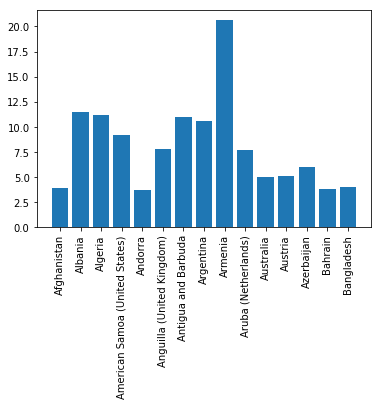

In [32]:
plt.bar(d1['Name'],d1['Unemployment_rate'])
plt.xticks(rotation=90)


In [33]:
df['Unemployment_rate'].describe()

count    199.000000
mean      10.017286
std        8.983824
min        0.300000
25%        4.300000
50%        6.900000
75%       12.250000
max       50.000000
Name: Unemployment_rate, dtype: float64

In [34]:
df1 = df[df['Unemployment_rate'] > 15]

In [35]:
df1.shape

(34, 2)

<Figure size 2160x1440 with 0 Axes>

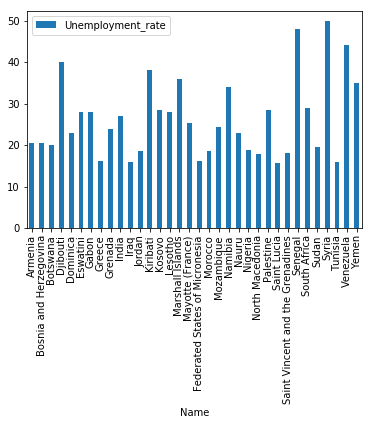

In [39]:
plt.figure(figsize=(30,20))

df1.plot(kind = 'bar',x ='Name')


These represent the countries with high employment rate

In [51]:
df2 = df[df['Unemployment_rate'] <= 15]
df2.shape

(165, 2)

In [57]:
df2

,Name,Unemployment_rate
1,Afghanistan,3.9
2,Albania,11.5
3,Algeria,11.2
4,American Samoa (United States),9.2
5,Andorra,3.7
...,...,...
194,Vietnam,2.2
195,U.S. Virgin Islands (United States),9.5
196,Wallis and Futuna (France),12.2
198,Zambia,15.0
